In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('ipl.csv')
data.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [3]:
data.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


In [4]:
data.shape

(76014, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [6]:
data.drop(['mid','striker','non-striker','batsman', 'bowler'],axis=1,inplace=True)
data.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [7]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [8]:
present_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab','Royal Challengers Bangalore', 'Delhi Daredevils',
       'Sunrisers Hyderabad']

In [9]:
data = data[data['bat_team'].isin(present_team) & data['bowl_team'].isin(present_team)]

In [10]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [11]:
#removing first 5 overs
data  = data[data['overs']>=5.0]
data.shape

(40108, 10)

In [12]:
# converting date from object to date format

from datetime import datetime
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [13]:
stadium = data[data['runs']>=232]['venue'].unique() 
stadium

array(['Punjab Cricket Association Stadium, Mohali',
       'MA Chidambaram Stadium, Chepauk',
       'Himachal Pradesh Cricket Association Stadium', 'Wankhede Stadium'],
      dtype=object)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            40108 non-null  datetime64[ns]
 1   venue           40108 non-null  object        
 2   bat_team        40108 non-null  object        
 3   bowl_team       40108 non-null  object        
 4   runs            40108 non-null  int64         
 5   wickets         40108 non-null  int64         
 6   overs           40108 non-null  float64       
 7   runs_last_5     40108 non-null  int64         
 8   wickets_last_5  40108 non-null  int64         
 9   total           40108 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 3.4+ MB


In [15]:
for fam in stadium:
    data[fam] = np.where(data['venue'] == fam, 1,0)

data.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,"Punjab Cricket Association Stadium, Mohali","MA Chidambaram Stadium, Chepauk",Himachal Pradesh Cricket Association Stadium,Wankhede Stadium
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222,0,0,0,0
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222,0,0,0,0
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222,0,0,0,0
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222,0,0,0,0
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222,0,0,0,0


In [16]:
data.drop(['venue'], axis = 1,inplace=True)

In [17]:
data.head(2)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,"Punjab Cricket Association Stadium, Mohali","MA Chidambaram Stadium, Chepauk",Himachal Pradesh Cricket Association Stadium,Wankhede Stadium
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222,0,0,0,0
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222,0,0,0,0


In [18]:
data = pd.get_dummies(data, drop_first=True)
data

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,"Punjab Cricket Association Stadium, Mohali","MA Chidambaram Stadium, Chepauk",Himachal Pradesh Cricket Association Stadium,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,106,9,18.1,29,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75885,2017-05-19,107,9,18.2,29,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75886,2017-05-19,107,9,18.3,28,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75887,2017-05-19,107,9,18.4,24,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   date                                          40108 non-null  datetime64[ns]
 1   runs                                          40108 non-null  int64         
 2   wickets                                       40108 non-null  int64         
 3   overs                                         40108 non-null  float64       
 4   runs_last_5                                   40108 non-null  int64         
 5   wickets_last_5                                40108 non-null  int64         
 6   total                                         40108 non-null  int64         
 7   Punjab Cricket Association Stadium, Mohali    40108 non-null  int32         
 8   MA Chidambaram Stadium, Chepauk               40108 non-null  int

In [20]:
data.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'Punjab Cricket Association Stadium, Mohali',
       'MA Chidambaram Stadium, Chepauk',
       'Himachal Pradesh Cricket Association Stadium', 'Wankhede Stadium',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [21]:
clean_data = data[['date','Punjab Cricket Association Stadium, Mohali',
       'MA Chidambaram Stadium, Chepauk',
       'Himachal Pradesh Cricket Association Stadium', 'Wankhede Stadium',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total']]

In [22]:
clean_data.head(3)

,date,"Punjab Cricket Association Stadium, Mohali","MA Chidambaram Stadium, Chepauk",Himachal Pradesh Cricket Association Stadium,Wankhede Stadium,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,0,0,0,1,0,0,...,0,0,1,0,61,0,5.1,59,0,222
33,2008-04-18,0,0,0,0,0,0,1,0,0,...,0,0,1,0,61,1,5.2,59,1,222
34,2008-04-18,0,0,0,0,0,0,1,0,0,...,0,0,1,0,61,1,5.3,59,1,222


In [23]:
# splitting data

xtrain = clean_data[clean_data.date.dt.year <= 2016].drop('total',axis=1).values
xtest = clean_data[clean_data.date.dt.year >  2016].drop('total',axis=1).values

In [24]:
ytrain = clean_data[clean_data.date.dt.year <= 2016]['total'].values
ytest = clean_data[clean_data.date.dt.year > 2016]['total'].values

In [25]:
print(xtrain.shape)
print(ytrain.shape)

(37330, 24)
(37330,)


In [26]:
#xtrain.drop([0], axis=1, inplace=True)
#xtest.drop([0], axis=1, inplace=True)

In [27]:
xtrain = xtrain[:,1:]
xtest = xtest[:,1:]

In [28]:
# Linear Regression (simple, ridge, lasso)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [29]:
ypred = lr.predict(xtest)

In [30]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [31]:
print('MAE', mean_absolute_error(ytest,ypred))
print('MSE', mean_squared_error(ytest,ypred))
print('RMAE', np.sqrt(mean_absolute_error(ytest,ypred)))

MAE 12.260780826332358
MSE 254.17900281343478
RMAE 3.501539779344561


In [32]:
#ridge
ridge = Ridge()
parameters = {'alpha':[1e-7, 1e-4, 0.2, 1, 2, 5, 15, 40, 80, 150, 250, 800, 1500, 3000,  10000]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=20)
ridge_regressor.fit(xtrain, ytrain)

GridSearchCV(cv=20, estimator=Ridge(),
             param_grid={'alpha': [1e-07, 0.0001, 0.2, 1, 2, 5, 15, 40, 80, 150,
                                   250, 800, 1500, 3000, 10000]},
             scoring='neg_mean_squared_error')

In [33]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 3000}
-319.31307726525836


In [34]:
prediction = ridge_regressor.predict(xtest)

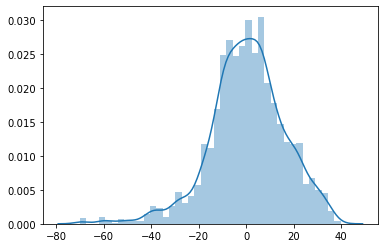

In [35]:
sns.distplot(ytest-prediction)

In [36]:
print('MAE', mean_absolute_error(ytest,prediction))
print('MSE', mean_squared_error(ytest,prediction))
print('RMAE', np.sqrt(mean_absolute_error(ytest,prediction)))

MAE 12.137726413331817
MSE 253.55000429074036
RMAE 3.4839239964918605


In [37]:
# Lasso

lasso = Lasso()
parameters = {'alpha':[ 1e-4, 0.2, 1, 15]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=20)
lasso_regressor.fit(xtrain, ytrain)

GridSearchCV(cv=20, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.2, 1, 15]},
             scoring='neg_mean_squared_error')

In [38]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.2}
-318.6051512184514


In [39]:
yp = lasso_regressor.predict(xtest)

print('MAE', mean_absolute_error(ytest,yp))
print('MSE', mean_squared_error(ytest,yp))
print('RMSE', np.sqrt(mean_absolute_error(ytest,yp)))

MAE 12.217671601584293
MSE 256.19492575888535
RMSE 3.495378606329262


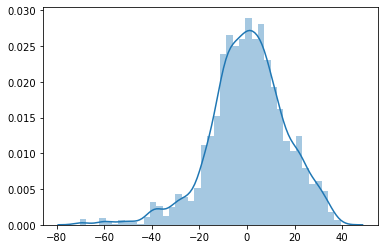

In [40]:
sns.distplot(ytest-yp)

In [41]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
poly = pf.fit_transform(xtrain)
lin = LinearRegression()
lin.fit(poly, ytrain)

LinearRegression()

In [42]:
polypred = lin.predict(pf.fit_transform(xtest))

In [43]:
print(r2_score(ytest, polypred))

0.7268536017602055


In [44]:
## testing

In [45]:
clean_data.iloc[1]

date                                            2008-04-18 00:00:00
Punjab Cricket Association Stadium, Mohali                        0
MA Chidambaram Stadium, Chepauk                                   0
Himachal Pradesh Cricket Association Stadium                      0
Wankhede Stadium                                                  0
bat_team_Delhi Daredevils                                         0
bat_team_Kings XI Punjab                                          0
bat_team_Kolkata Knight Riders                                    1
bat_team_Mumbai Indians                                           0
bat_team_Rajasthan Royals                                         0
bat_team_Royal Challengers Bangalore                              0
bat_team_Sunrisers Hyderabad                                      0
bowl_team_Delhi Daredevils                                        0
bowl_team_Kings XI Punjab                                         0
bowl_team_Kolkata Knight Riders                 

In [46]:
print(lr.predict([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 61, 1, 5.2, 59, 1]]))

[181.76638428]


In [47]:
print(ridge_regressor.predict([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 61, 1, 5.2, 59, 1]]))

[183.18091986]


In [48]:
print(lasso_regressor.predict([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 61, 1, 5.2, 59, 1]]))

[183.83285555]


In [49]:
print(lr.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 80, 2, 7.2, 45, 1]]))

[188.4298185]


In [50]:
188-4

184

In [51]:
188+4

192

In [52]:
print(ridge_regressor.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 80, 2, 7.2, 45, 1]]))

[187.01987078]


In [53]:
print(lasso_regressor.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 80, 2, 7.2, 45, 1]]))

[187.48631084]


In [54]:
print(r2_score(ytest, ypred))
print(r2_score(ytest, prediction))
print(r2_score(ytest, yp))

0.7491336042619022
0.7497544053137843
0.7471439539846836
